# Metodo di Metropolis Hastings

Il metodo consiste nella generazione di una sequenza di numeri casuali che seguono la distribuzione voluta in cui **un numero è correlato al precedente**. Questo tipo di sequenze prendono il nome di Markov Chain.

Indicheremo qui $\vec{x}=(x,y)$ un punto in uno spazio a due dimensioni, ma l'approccio è generalizzabile a $n$ dimensioni.

Si definisce una regola per generare $\vec{x^\prime}$ abbastanza vicino ad $\vec{x}$. Ad esempio, generando uno scostamento gaussiano a $n$ dimensioni centrato su $\vec{x}$ con una data varianza $\sigma$ su ciascuna coordinata.

Il metodo consiste nei seguenti passi:
1. si parte da un punto $\vec{x}$ e si calcola $f=f(\vec{x})$
* si genera $\vec{x}^\prime$ a partire da $\vec{x}$ con la regola definita sopra
* si calcola $f^\prime=f(\vec{x}^\prime)$
* se $f^\prime > f$ si accetta $\vec{x}^\prime$ come nuovo punto della sequenza; altrimenti si accettasolo con una probabilità $p=f^\prime/f$.
* si torna al punto 2

È necessario scartare un certo numero di punti iniziali perché il punto di partenza potrebbe trovarsi in una regione dove la densità di probabilità è molto bassa.

Per costruzione, la distribuzione di probabilità dei punti nella sequenza sarà proporzionale a $f(\vec{x})$.

Un articolo di approfondimento per l'applicazione all'inferenza bayesiana si trova
<a href="https://towardsdatascience.com/from-scratch-bayesian-inference-markov-chain-monte-carlo-and-metropolis-hastings-in-python-ef21a29e25a">qui</a>.

In [1]:
from scipy.stats import norm
from scipy.stats import uniform
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
def fn(x, y):
    g1 =  0.4*math.exp(-0.5*math.pow((x - 4),2))*math.exp(-0.5*math.pow((y - 6),2))
    g2 = 0.6*math.exp(-0.5*math.pow((x - 6),2))*math.exp(-0.5*math.pow((y - 4),2))
    return g1 + g2

In [3]:
n, ni = 20000, 20
xx, yy= np.empty(n), np.empty(n)
xi, yi = np.empty(ni), np.empty(ni)
x, y = 9, 9
f = fn(x, y)
for i in range(n):
    xx[i], yy[i] = x, y
    if i < ni: xi[i], yi[i] = x, y
    reject = True
    while True:
        x1, y1 = x + norm.rvs(scale=0.5), y + norm.rvs(scale=0.5)
        f1 = fn(x1, y1)
        r = min(1.0, f1/f)
        if (uniform.rvs() <= r): reject = False
        if not reject: break
    x, y, f = x1, y1, f1

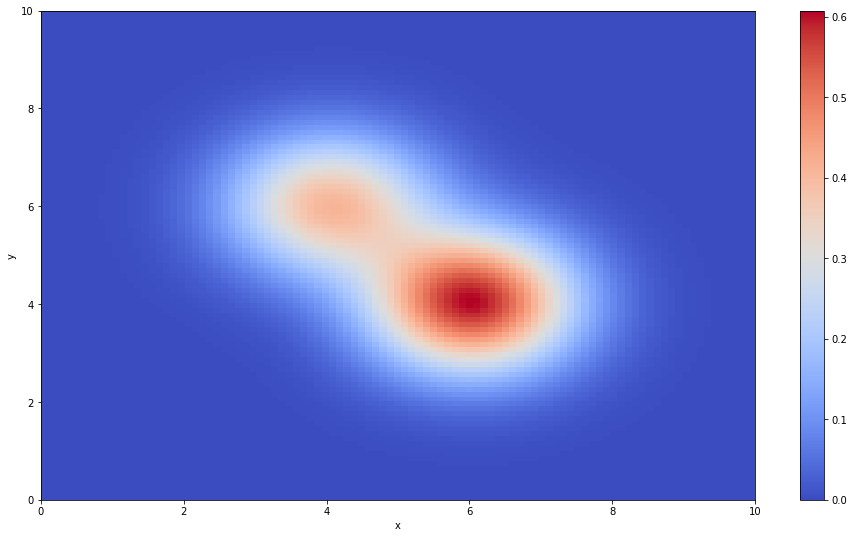

In [4]:
fig, ax = plt.subplots(figsize=(16,9))
x_p = np.linspace(0, 10, 100)
y_p = np.linspace(0, 10, 100)
x, y = np.meshgrid(x_p, y_p)
z = np.vectorize(fn)(x, y)
col = ax.pcolormesh(x, y, z, cmap=cm.coolwarm, vmin=z.min(), vmax=z.max())
fig.colorbar(col,aspect=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

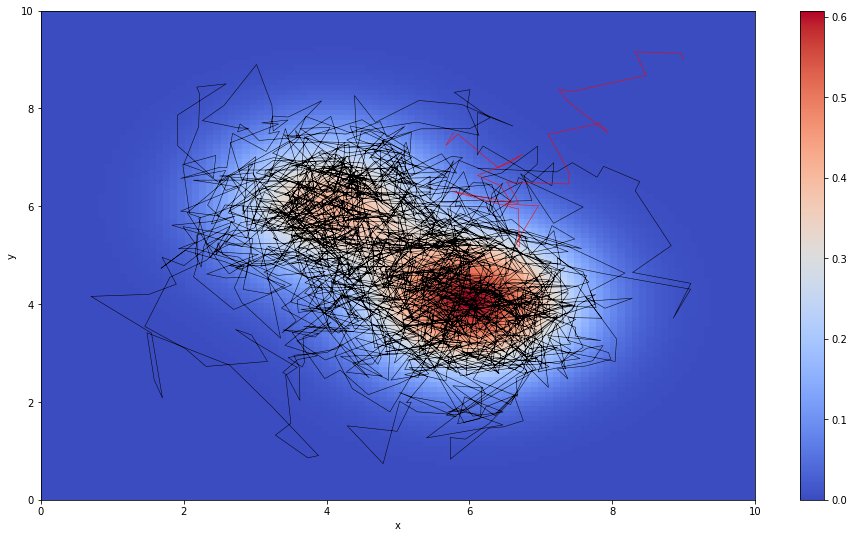

In [5]:
fig, ax = plt.subplots(figsize=(16,9))
x_p = np.linspace(0, 10, 100)
y_p = np.linspace(0, 10, 100)
x, y = np.meshgrid(x_p, y_p)
z = np.vectorize(fn)(x, y)
col = ax.pcolormesh(x, y, z, cmap=cm.coolwarm, vmin=z.min(), vmax=z.max())
fig.colorbar(col,aspect=20)
n0, nn = 30,2000
plt.plot(xx[n0:nn],yy[n0:nn], linewidth=0.5, color='black')
plt.plot(xx[:n0],yy[:n0], linewidth=0.5, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

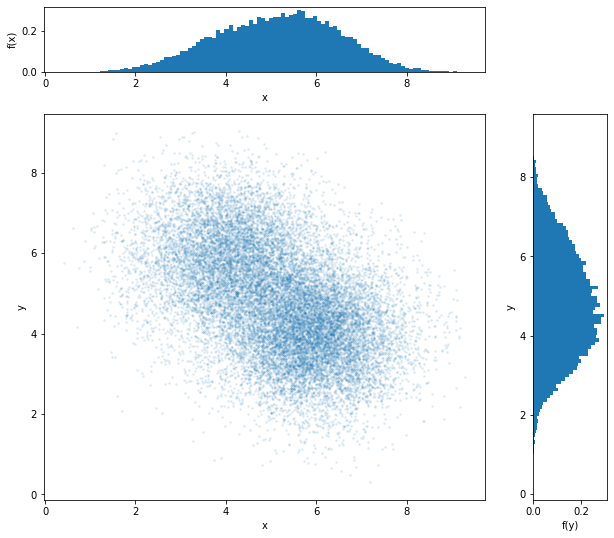

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(10, 12)
ax0 = plt.subplot(gs[6:10, 5:9])
axx = plt.subplot(gs[5:6, 5:9])
axy = plt.subplot(gs[6:10, 9:10])
ax0.scatter(xx[n0:], yy[n0:], marker='.', s=10, alpha=0.1)
ax0.set_xlabel('x')
ax0.set_ylabel('y')
nx, binsx, px = axx.hist(xx, 100, density=True)
axx.set_xlabel('x')
axx.set_ylabel('f(x)')
ny, binsy, py = axy.hist(yy, 100, density=True, orientation='horizontal')
axy.set_xlabel('f(y)')
axy.set_ylabel('y')
fig.tight_layout()

## Approfondimenti

* [MCMC and the Ising Model](https://tanyaschlusser.github.io/posts/mcmc-and-the-ising-model/) (c'è una discussione sull'interpretazione bayesiana, da leggere dopo aver seguito le prossime lezioni)
* [Ising model demo](https://physics.weber.edu/schroeder/software/demos/IsingModel.html)
* [Ising model online](https://mattbierbaum.github.io/ising.js/)

## Spunti per esercizi

* implementare un MCMC per una PDF a scelta in 3 dimensioni e graficarne le tre proiezioni monodimensionali ($x$, $y$, e $z$) e le 3 proiezioni bidimensionali ($xy$, $yz$ e $zx$)